In [1]:
import pandas as pd
import os




In [2]:
uniprot_raw_path = '../dataset/raw_dataset/ec_datasets/uniprot_raw'
split_ec_dataset_save_path = '../dataset/raw_dataset/ec_datasets/split_ec_dataset'
ecreact_dataset_path =  os.path.join(os.path.dirname(uniprot_raw_path), 'ecreact-1.0.csv')

ecreact_dataset = pd.read_csv(ecreact_dataset_path)
download_uniprot_dataset_path = os.path.join(uniprot_raw_path, 'uniprot-download_sequence_site_ec_clean.pkl')

download_uniprot_dataset = pd.read_pickle(download_uniprot_dataset_path)

train_download_uniprot_dataset = pd.read_pickle(os.path.join(split_ec_dataset_save_path, 'train_ec_uniprot_dataset_cluster_sample.pkl'))

validation_dataset = pd.read_pickle(os.path.join(split_ec_dataset_save_path, 'validation_ec_uniprot_dataset_cluster_sample.pkl'))

uniprot_test_dataset = pd.read_pickle(os.path.join(split_ec_dataset_save_path, 'test_ec_uniprot_dataset_cluster_sample.pkl'))



In [3]:
import subprocess

# 定义CD-HIT命令和参数

def run_subprocess_and_print(args):
    # 开启一个新的进程
    with subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True) as proc:
        # 实时读取输出
        while True:
            output = proc.stdout.readline()
            if output == '' and proc.poll() is not None:
                break
            if output:
                print(output.strip())  # 输出每一行
        # 检查错误输出
        err = proc.stderr.read()
        if err:
            print("Error:", err)
    proc.communicate()

threshold = [0.8, 0.6, 0.4]
command = "/home/xiaoruiwang/software/cdhit/cd-hit"
for thre in threshold:
    if thre < 0.5:
        word = 2
    elif thre < 0.6:
        word = 3
    elif thre < 0.7:
        word = 4
    else:
        word = 5
    args = ["-i", os.path.abspath(os.path.join(uniprot_raw_path, 'all_sequence.fasta')),
            "-o", os.path.abspath(os.path.join(uniprot_raw_path, f'sequence_cutoff_{str(thre)}.fasta')), 
            "-c", str(thre),
            "-n", str(word),
            "-T", str(12)]
    print('Args: {}'.format(' '.join(args)))
    if not os.path.exists(os.path.abspath(os.path.join(uniprot_raw_path, f'sequence_cutoff_{str(thre)}.fasta'))):
        run_subprocess_and_print([command] + args)

Args: -i /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/all_sequence.fasta -o /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/sequence_cutoff_0.8.fasta -c 0.8 -n 5 -T 12
Args: -i /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/all_sequence.fasta -o /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/sequence_cutoff_0.6.fasta -c 0.6 -n 4 -T 12
Args: -i /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/all_sequence.fasta -o /home/xiaoruiwang/data/ubuntu_work_beta/single_step_work/EasIFA_v2/dataset/raw_dataset/ec_datasets/uniprot_raw/sequence_cutoff_0.4.fasta -c 0.4 -n 2 -T 12


In [4]:
from collections import defaultdict
def get_cluster(cluster_results_path):
    results = defaultdict(list)
    with open(cluster_results_path, 'r', encoding='utf-8') as f:
        data = [x.strip() for x in f.readlines()]
    for line in data:
        if '>Cluster' in line:
            cluster = line.replace('>', '')
            continue
        alphadb_id = line.split('>')[-1].split('.')[0]
        results[cluster].append(alphadb_id)
    return results


def id2cluster(cluster_results:dict):
    alphafold_id2cluster = {}
    for key in cluster_results:
        for id in cluster_results[key]:
            alphafold_id2cluster[id] = key
    return alphafold_id2cluster


In [5]:
threshold = [0.8, 0.6, 0.4]
alphafold_id2cluster_all_levels = {}
cluster_all_levels2alphafold_id = {}
for thre in threshold:
    cluster_results_path = os.path.abspath(os.path.join(uniprot_raw_path, f'sequence_cutoff_{str(thre)}.fasta.clstr'))
    cluster_results = get_cluster(cluster_results_path)
    print(len(cluster_results))
    alphafold_id2cluster_all_levels[thre] = id2cluster(cluster_results)
    cluster_all_levels2alphafold_id[thre] = cluster_results

92745
52205
20173


In [6]:
alphafold_id2cluster_all_levels[thre]

{'Q5TA45': 'Cluster 0',
 'Q3MHC2': 'Cluster 0',
 'Q9VAH9': 'Cluster 0',
 'Q9CWS4': 'Cluster 0',
 'Q503E1': 'Cluster 0',
 'P0DKX1': 'Cluster 0',
 'P32185': 'Cluster 0',
 'Q2YDM2': 'Cluster 0',
 'P20732': 'Cluster 0',
 'Q5ZIH0': 'Cluster 0',
 'P81343': 'Cluster 0',
 'Q5NVE6': 'Cluster 0',
 'O43272': 'Cluster 1',
 'Q9WU79': 'Cluster 1',
 'Q148G5': 'Cluster 1',
 'P55736': 'Cluster 1',
 'P84812': 'Cluster 1',
 'Q8NHQ9': 'Cluster 2',
 'Q8JHJ2': 'Cluster 2',
 'Q6ZPL9': 'Cluster 2',
 'P0C2D3': 'Cluster 2',
 'Q9FLB0': 'Cluster 2',
 'Q8GXD6': 'Cluster 2',
 'P19662': 'Cluster 2',
 'P80055': 'Cluster 2',
 'P81528': 'Cluster 2',
 'Q5ZLN8': 'Cluster 2',
 'Q6AZV7': 'Cluster 2',
 'P0CAT0': 'Cluster 2',
 'P85441': 'Cluster 2',
 'P56948': 'Cluster 2',
 'P81419': 'Cluster 2',
 'Q9M2Z3': 'Cluster 3',
 'P0CC16': 'Cluster 3',
 'P0DI85': 'Cluster 3',
 'Q96LT4': 'Cluster 4',
 'Q9DA37': 'Cluster 4',
 'Q9VS60': 'Cluster 4',
 'P0C0N0': 'Cluster 4',
 'P18692': 'Cluster 4',
 'P41833': 'Cluster 5',
 'P0DJJ1': 'Clus

In [7]:
max_sample = 100            # 控制生成数据的上限
merge_dataset_name_str = 'uniprot_ecreact_cluster_split_merge_dataset_limit_'
ec_site_dataset_path = '../dataset/ec_site_dataset/'

In [8]:
from tqdm import tqdm
def get_dataset(max_sample, ec_site_dataset_path=ec_site_dataset_path,  
                merge_dataset_name_str='uniprot_ecreact_merge_dataset_limit_', 
                sub_set=['train', 'valid', 'test']):
    
    uniprot_ecreact_merge_dataset_path = os.path.join(ec_site_dataset_path, f'{merge_dataset_name_str}{max_sample}')
    dataset = pd.DataFrame()

    for dataset_flag in sub_set:
        folder_path = os.path.join(uniprot_ecreact_merge_dataset_path, f'{dataset_flag}_dataset')
        csv_fnames = os.listdir(folder_path)
        pbar = tqdm(
            csv_fnames,
            total=len(csv_fnames),
            desc=f'{dataset_flag}'
        )


        for fname in pbar:
            df = pd.read_csv(os.path.join(folder_path, fname))
            # df = df[['alphafolddb-id', 'aa_sequence']]
            dataset = pd.concat([dataset, df])
            

    # info_df = info_df.drop_duplicates(subset=['alphafolddb-id', 'aa_sequence']).reset_index(drop=True)
    return dataset

In [9]:
train_dataset = get_dataset(max_sample, ec_site_dataset_path=ec_site_dataset_path, merge_dataset_name_str=merge_dataset_name_str, sub_set=['train'])
test_dataset = get_dataset(max_sample, ec_site_dataset_path=ec_site_dataset_path, merge_dataset_name_str=merge_dataset_name_str, sub_set=['test'])

test: 100%|██████████| 1/1 [00:00<00:00, 153.84it/s]


In [10]:
for thre in threshold:
    train_dataset[f'cluster_ther_{str(thre)}'] = train_dataset['alphafolddb-id'].apply(lambda x:alphafold_id2cluster_all_levels[thre][x.replace(';', '')])
    test_dataset[f'cluster_ther_{str(thre)}'] = test_dataset['alphafolddb-id'].apply(lambda x:alphafold_id2cluster_all_levels[thre][x.replace(';', '')])

In [11]:
train_dataset.head()

,reaction,ec,pdb-id,alphafolddb-id,aa_sequence,site_labels,site_types,cluster_ther_0.8,cluster_ther_0.6,cluster_ther_0.4
0,Cc1cc2c(cc1C)N(C[C@H](O)[C@H](O)[C@H](O)COP(=O...,1.14.14.140,NaN,P93149;,MEPQLVAVSVLVSALICYFFFRPYFHRYGKNLPPSPFFRLPIIGHM...,[[448]],[0],Cluster 6840,Cluster 4164,Cluster 2164
0,CC(=O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185
1,CC[C@@H](O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185
2,CC[C@@H](O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185
3,CC(=O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,1.1.1.36,1UZL;1UZM;1UZN;2NTN;,P9WGT3;,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,"[[25, 27], [47], [61, 62], [90], [153], [157],...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]",Cluster 65688,Cluster 37029,Cluster 11185


In [12]:
test_dataset.head()

,reaction,ec,pdb-id,alphafolddb-id,aa_sequence,site_labels,site_types,cluster_ther_0.8,cluster_ther_0.6,cluster_ther_0.4
0,Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[...,1.-.-.-,4JJ0;4JJ3;,A0A1S7LCW6;,MKLKGTTIVALGMLVVAIMVLASMIDLPGSDMSATPAPPDTPRGAP...,"[[206], [212], [215], [216], [246], [252], [25...","[0, 0, 0, 0, 0, 0, 0, 0]",Cluster 64304,Cluster 36236,Cluster 14029
1,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...,1.-.-.-,1E5D;,Q9F0J6;,MQATKIIDGFHLVGAIDWNSRDFHGYTLSPMGTTYNAYLVEDEKTT...,"[[79], [81], [83], [146], [165], [165], [226]]","[0, 0, 0, 0, 0, 0, 0]",Cluster 27949,Cluster 15695,Cluster 7204
2,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...,1.-.-.-,7LO1;,Q5BEJ7;,MADHEQEQEPLSIAIIGGGIIGLMTALGLLHRNIGKVTIYERASAW...,"[[41, 42], [245, 247], [320], [330, 334]]","[0, 0, 0, 0]",Cluster 20095,Cluster 11592,Cluster 3039
3,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(...,1.-.-.-,5EZ7;,Q9HUH4;,MPQALSTDILIVGGGIAGLWLNARLRRAGYATVLVESASLGGGQSV...,"[[17], [36], [44, 45], [49, 51], [346, 347]]","[0, 0, 0, 0, 0]",Cluster 30288,Cluster 17020,Cluster 7747
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(...,1.-.-.-,3BEM;,P96692;,MAEFTHLVNERRSASNFLSGHPITKEDLNEMFELVALAPSAFNLQH...,"[[11, 13], [68, 70], [157, 158], [193], [196]]","[0, 0, 0, 0, 0]",Cluster 77970,Cluster 43945,Cluster 17516


In [13]:
similarity_index_levels = ['0~40%', '40~60%', '60~80%']
def get_similarity_index_level(level1_cls, level2_cls, level3_cls, train_dataset):

    if (level3_cls not in train_dataset['cluster_ther_0.4'].tolist()):  # 在0.4阈值下与训练集没有相同的cluster，则代表相似度小于0.4
        return similarity_index_levels[0]  # 0~0.4
    else: # 在0.4阈值下，与训练集有相同的cluster，则相似度大于0.4
        if (level2_cls not in train_dataset['cluster_ther_0.6'].tolist()): # 在0.6阈值下与训练集没有相同的cluster，则代表相似度小于0.6
            return similarity_index_levels[1] # 0.4~0.6
        else:
            return similarity_index_levels[2] # 0.6~0.8

In [14]:
test_dataset['similarity_index_level'] = test_dataset.apply(lambda row: get_similarity_index_level(row['cluster_ther_0.8'], row['cluster_ther_0.6'], row['cluster_ther_0.4'], train_dataset), axis=1)

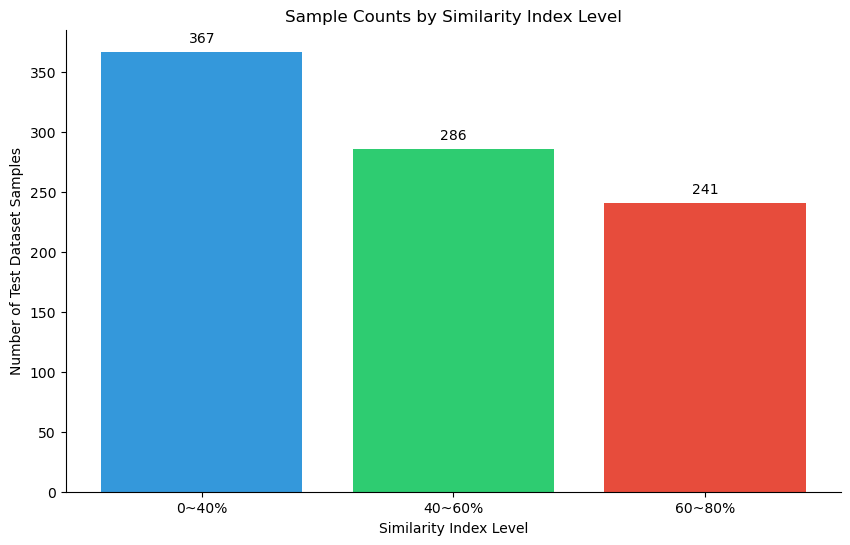

In [15]:
import matplotlib.pyplot as plt


thresholds = similarity_index_levels
sample_counts = [(test_dataset['similarity_index_level'] == x).sum() for x in thresholds]



colors = ['#3498db', '#2ecc71', '#e74c3c']  


plt.figure(figsize=(10, 6)) 
plt.bar(thresholds, sample_counts, color=colors)
ax = plt.gca()  
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 

plt.title('Sample Counts by Similarity Index Level')
plt.xlabel('Similarity Index Level')
plt.ylabel('Number of Test Dataset Samples')


for i, count in enumerate(sample_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')


plt.show()


In [16]:
test_dataset.to_csv(os.path.join(ec_site_dataset_path, merge_dataset_name_str+f'{max_sample}', 'test_dataset_with_similarity_idx.csv'), index=False)

In [17]:
cluster_all_levels2alphafold_id[0.8]

defaultdict(list,
            {'Cluster 0': ['Q5TA45',
              'Q3MHC2',
              'Q9CWS4',
              'Q503E1',
              'Q2YDM2',
              'Q5ZIH0',
              'Q5NVE6'],
             'Cluster 1': ['O43272', 'Q9WU79', 'Q148G5'],
             'Cluster 2': ['Q8NHQ9', 'Q6ZPL9', 'Q5ZLN8'],
             'Cluster 3': ['Q9M2Z3'],
             'Cluster 4': ['Q9VS60'],
             'Cluster 5': ['P41833'],
             'Cluster 6': ['Q10KY3'],
             'Cluster 7': ['Q20624', 'Q20624'],
             'Cluster 8': ['Q93W95'],
             'Cluster 9': ['P23219', 'O62664', 'P05979'],
             'Cluster 10': ['P96890', 'P46392'],
             'Cluster 11': ['T1RR71', 'T1RRL8', 'T1RRI8'],
             'Cluster 12': ['Q6AZT2'],
             'Cluster 13': ['V5NC32', 'Q3L243', 'Q0R4L2'],
             'Cluster 14': ['Q5W915', 'Q09WE7'],
             'Cluster 15': ['Q8J2T0'],
             'Cluster 16': ['P0CI73', 'E0U070', 'Q65P46'],
             'Cluster 17': ['P0DI76

In [18]:
import subprocess
tmscore_path='/home/xiaoruiwang/software/TMalign/TMscore'
def calculate_tmscore(pdb_file1, pdb_file2, tmscore_path='TMscore'):
    """
    Calculate the TMscore for two PDB files using the TMscore program.
    
    Args:
    pdb_file1 (str): Path to the first PDB file.
    pdb_file2 (str): Path to the second PDB file.    默认的标准化基准
    tmscore_path (str): Path to the TMscore executable.
    
    Returns:
    float: The TMscore of the two PDB structures.
    """
    # 构建命令行命令
    command = [tmscore_path, pdb_file1, pdb_file2]
    
    # 调用 subprocess.run 来执行 TMscore
    result = subprocess.run(command, stdout=subprocess.PIPE, text=True)
    
    # 解析输出，查找TM-score
    tmscore = None
    for line in result.stdout.split('\n'):
        if line.strip().startswith('TM-score'):
            # print(line.strip())
            parts = line.split('=')
            if len(parts) > 1:
                tmscore = float(parts[1].split()[0])
                break
    
    return tmscore

# 调用函数
# pdb1 = "/home/xiaoruiwang/software/TMalign/PDB2.pdb"
# pdb2 = "/home/xiaoruiwang/software/TMalign/PDB1.pdb"
# tmscore = calculate_tmscore(tmscore_path='/home/xiaoruiwang/software/TMalign/TMscore',pdb_file1=pdb1, pdb_file2=pdb2)
# print("Calculated TMscore:", tmscore)


In [22]:
def get_structure_TMScore(row, train_dataset, pdb_path='../dataset/ec_site_dataset/structures/alphafolddb_download'):
    alphafold_id = row['alphafolddb-id'].replace(';', '')
    most_similar_train_id = []
    for cluster_ther in ['cluster_ther_0.8', 'cluster_ther_0.6', 'cluster_ther_0.4']:
        most_similar_train_id.extend(train_dataset.loc[train_dataset[cluster_ther] == row[cluster_ther]]['alphafolddb-id'].tolist())
        if len(most_similar_train_id) != 0:
            break # 只取序列最相似的去比较结构相似的
    train_pdb_names = [os.path.abspath(os.path.join(pdb_path, 'AF-{}-F1-model_v4.pdb'.format(alphafold_id.replace(';', '')))) for alphafold_id in most_similar_train_id]
    test_pdb_name = os.path.abspath(os.path.join(pdb_path, f'AF-{alphafold_id}-F1-model_v4.pdb'))
    max_tmscore = 0
    for train_pdb_name in train_pdb_names:
        tmscore = calculate_tmscore(train_pdb_name, test_pdb_name, tmscore_path=tmscore_path)
        if max_tmscore < tmscore:
            max_tmscore = tmscore
    if max_tmscore > 0.5: print(f'TM-score >0.5 in {alphafold_id}')
    return max_tmscore

In [23]:
tqdm.pandas()
test_dataset['max_tmscore'] = test_dataset.progress_apply(lambda row:get_structure_TMScore(row, train_dataset), axis=1)

  0%|          | 0/894 [00:00<?, ?it/s]

  0%|          | 4/894 [00:00<02:14,  6.59it/s]

TM-score >0.5 in Q5BEJ7


  2%|▏         | 14/894 [00:05<06:15,  2.35it/s]

TM-score >0.5 in A5CAL1


  2%|▏         | 15/894 [00:06<06:16,  2.33it/s]

TM-score >0.5 in Q59787


  2%|▏         | 20/894 [00:11<11:51,  1.23it/s]

TM-score >0.5 in Q4DJ07


  2%|▏         | 22/894 [00:12<09:19,  1.56it/s]

TM-score >0.5 in P42327


  3%|▎         | 23/894 [00:28<52:57,  3.65s/it]

TM-score >0.5 in O67610


  3%|▎         | 25/894 [00:29<36:08,  2.50s/it]

TM-score >0.5 in P11759


  3%|▎         | 26/894 [00:29<30:09,  2.09s/it]

TM-score >0.5 in Q59787


  3%|▎         | 27/894 [00:30<24:36,  1.70s/it]

TM-score >0.5 in Q76L37


  3%|▎         | 29/894 [00:30<16:49,  1.17s/it]

TM-score >0.5 in P17618


  3%|▎         | 30/894 [00:59<1:41:26,  7.04s/it]

TM-score >0.5 in P75691


  4%|▎         | 32/894 [01:00<1:04:40,  4.50s/it]

TM-score >0.5 in P50098


  4%|▍         | 34/894 [01:22<1:39:09,  6.92s/it]

TM-score >0.5 in Q0P8H3


  4%|▍         | 35/894 [01:26<1:27:59,  6.15s/it]

TM-score >0.5 in Q606Q2


  4%|▍         | 37/894 [01:28<59:35,  4.17s/it]  

TM-score >0.5 in Q5KWX7


  4%|▍         | 38/894 [01:29<47:06,  3.30s/it]

TM-score >0.5 in A5CAL1


  5%|▍         | 41/894 [01:35<42:36,  3.00s/it]

TM-score >0.5 in P50933


  5%|▍         | 43/894 [01:42<43:16,  3.05s/it]

TM-score >0.5 in A9BGZ9


  5%|▌         | 45/894 [01:49<44:28,  3.14s/it]

TM-score >0.5 in Q54UF7


  5%|▌         | 46/894 [01:56<59:05,  4.18s/it]

TM-score >0.5 in O83080


  5%|▌         | 47/894 [02:06<1:19:37,  5.64s/it]

TM-score >0.5 in Q5SIJ1


  6%|▌         | 51/894 [02:08<36:34,  2.60s/it]  

TM-score >0.5 in P33312


  6%|▌         | 53/894 [02:15<41:59,  3.00s/it]

TM-score >0.5 in Q6V4H0


  6%|▌         | 55/894 [02:19<37:02,  2.65s/it]

TM-score >0.5 in P06632


  6%|▋         | 56/894 [02:20<30:41,  2.20s/it]

TM-score >0.5 in P14697


  6%|▋         | 58/894 [02:21<21:47,  1.56s/it]

TM-score >0.5 in Q65T37


  7%|▋         | 60/894 [02:43<1:23:00,  5.97s/it]

TM-score >0.5 in Q64BR7


  7%|▋         | 62/894 [02:45<53:33,  3.86s/it]  

TM-score >0.5 in Q9I5I6


  7%|▋         | 63/894 [02:47<44:44,  3.23s/it]

TM-score >0.5 in C0KTJ6


  7%|▋         | 64/894 [02:54<59:22,  4.29s/it]

TM-score >0.5 in P28834


  7%|▋         | 67/894 [02:56<31:33,  2.29s/it]

TM-score >0.5 in Q977U7


  8%|▊         | 68/894 [02:58<30:54,  2.25s/it]

TM-score >0.5 in P48828


  8%|▊         | 69/894 [02:58<25:02,  1.82s/it]

TM-score >0.5 in A5CAL1


  8%|▊         | 70/894 [02:59<22:09,  1.61s/it]

TM-score >0.5 in P25984


  8%|▊         | 72/894 [03:28<1:46:58,  7.81s/it]

TM-score >0.5 in Q9WZ26


  9%|▊         | 77/894 [03:44<45:26,  3.34s/it]  

TM-score >0.5 in Q9ZBU1


  9%|▉         | 80/894 [03:48<29:38,  2.19s/it]

TM-score >0.5 in P07788


  9%|▉         | 81/894 [03:50<30:12,  2.23s/it]

TM-score >0.5 in P00502


  9%|▉         | 83/894 [03:52<20:39,  1.53s/it]

TM-score >0.5 in P33912


 10%|▉         | 86/894 [03:54<15:57,  1.19s/it]

TM-score >0.5 in Q9UR19


 10%|▉         | 88/894 [03:59<21:55,  1.63s/it]

TM-score >0.5 in O52762


 10%|▉         | 89/894 [04:00<20:33,  1.53s/it]

TM-score >0.5 in P30263


 11%|█         | 99/894 [04:08<14:56,  1.13s/it]

TM-score >0.5 in P07773


 12%|█▏        | 103/894 [04:10<09:43,  1.36it/s]

TM-score >0.5 in Q53353


 12%|█▏        | 104/894 [04:10<09:11,  1.43it/s]

TM-score >0.5 in O31266


 12%|█▏        | 105/894 [04:11<09:09,  1.44it/s]

TM-score >0.5 in Q6J1Z6


 13%|█▎        | 113/894 [04:20<13:42,  1.05s/it]

TM-score >0.5 in Q8S0S6


 13%|█▎        | 115/894 [04:21<11:35,  1.12it/s]

TM-score >0.5 in Q88FY2


 13%|█▎        | 118/894 [04:26<15:35,  1.21s/it]

TM-score >0.5 in E9QYP0


 13%|█▎        | 119/894 [04:27<15:01,  1.16s/it]

TM-score >0.5 in P00438


 13%|█▎        | 120/894 [04:27<12:37,  1.02it/s]

TM-score >0.5 in F2R776


 14%|█▎        | 121/894 [04:28<14:11,  1.10s/it]

TM-score >0.5 in Q9HWG9


 14%|█▍        | 124/894 [04:32<14:35,  1.14s/it]

TM-score >0.5 in P10614


 15%|█▌        | 137/894 [04:46<08:40,  1.45it/s]

TM-score >0.5 in O25087
TM-score >0.5 in P9WNE5


 15%|█▌        | 138/894 [04:47<08:09,  1.54it/s]

TM-score >0.5 in Q9S2N0


 16%|█▌        | 142/894 [05:12<54:00,  4.31s/it]

TM-score >0.5 in Q56R04


 16%|█▌        | 143/894 [05:50<2:11:11, 10.48s/it]

TM-score >0.5 in Q2FWX9


 16%|█▋        | 147/894 [06:50<3:28:32, 16.75s/it]

TM-score >0.5 in P46795


 17%|█▋        | 149/894 [07:06<2:28:13, 11.94s/it]

TM-score >0.5 in P25553


 17%|█▋        | 152/894 [07:46<2:54:39, 14.12s/it]

TM-score >0.5 in Q56R04


 17%|█▋        | 153/894 [08:10<3:32:27, 17.20s/it]

TM-score >0.5 in Q56R04


 17%|█▋        | 156/894 [08:12<1:38:19,  7.99s/it]

TM-score >0.5 in A1U5W8


 18%|█▊        | 157/894 [08:26<1:52:37,  9.17s/it]

TM-score >0.5 in P07275


 18%|█▊        | 162/894 [08:30<46:30,  3.81s/it]  

TM-score >0.5 in Q5SMC7


 18%|█▊        | 164/894 [08:31<33:52,  2.78s/it]

TM-score >0.5 in Q4WZ70


 19%|█▊        | 167/894 [08:39<33:50,  2.79s/it]

TM-score >0.5 in P54322


 19%|█▉        | 168/894 [08:40<29:40,  2.45s/it]

TM-score >0.5 in Q97LU2


 19%|█▉        | 172/894 [08:41<13:49,  1.15s/it]

TM-score >0.5 in P26646


 19%|█▉        | 174/894 [08:54<33:12,  2.77s/it]

TM-score >0.5 in P84155


 20%|█▉        | 175/894 [08:54<28:03,  2.34s/it]

TM-score >0.5 in P07788


 20%|█▉        | 178/894 [08:57<20:04,  1.68s/it]

TM-score >0.5 in P26164


 20%|██        | 183/894 [09:14<26:51,  2.27s/it]

TM-score >0.5 in Q4U331


 21%|██        | 185/894 [09:50<1:31:52,  7.77s/it]

TM-score >0.5 in P96110


 21%|██        | 186/894 [09:51<1:14:50,  6.34s/it]

TM-score >0.5 in Q972D2


 21%|██        | 189/894 [10:04<1:04:18,  5.47s/it]

TM-score >0.5 in P38075


 21%|██▏       | 192/894 [10:05<39:39,  3.39s/it]  

TM-score >0.5 in P38999


 22%|██▏       | 201/894 [10:12<15:00,  1.30s/it]

TM-score >0.5 in Q9I5F3


 23%|██▎       | 203/894 [10:14<12:42,  1.10s/it]

TM-score >0.5 in Q9I509


 23%|██▎       | 206/894 [10:14<09:10,  1.25it/s]

TM-score >0.5 in C1I202


 23%|██▎       | 208/894 [10:15<07:08,  1.60it/s]

TM-score >0.5 in O07529


 23%|██▎       | 209/894 [10:16<07:42,  1.48it/s]

TM-score >0.5 in P38501


 24%|██▍       | 214/894 [10:20<08:21,  1.36it/s]

TM-score >0.5 in P05314


 24%|██▍       | 216/894 [10:21<08:00,  1.41it/s]

TM-score >0.5 in P43788


 24%|██▍       | 219/894 [10:25<11:11,  1.00it/s]

TM-score >0.5 in Q8GXX0


 25%|██▍       | 222/894 [10:25<06:29,  1.72it/s]

TM-score >0.5 in Q59109


 26%|██▌       | 231/894 [10:47<16:35,  1.50s/it]

TM-score >0.5 in Q9DCL4


 26%|██▌       | 233/894 [10:48<13:36,  1.24s/it]

TM-score >0.5 in O26249


 27%|██▋       | 237/894 [11:00<21:25,  1.96s/it]

TM-score >0.5 in P95748


 27%|██▋       | 240/894 [11:01<12:25,  1.14s/it]

TM-score >0.5 in P20589
TM-score >0.5 in A0R5M8


 27%|██▋       | 242/894 [11:05<15:57,  1.47s/it]

TM-score >0.5 in Q27793


 28%|██▊       | 247/894 [11:13<16:08,  1.50s/it]

TM-score >0.5 in Q9UL19


 29%|██▉       | 258/894 [11:47<41:54,  3.95s/it]

TM-score >0.5 in P48391


 29%|██▉       | 259/894 [11:50<40:02,  3.78s/it]

TM-score >0.5 in Q9K8V3


 29%|██▉       | 261/894 [11:51<30:06,  2.85s/it]

TM-score >0.5 in Q00267


 29%|██▉       | 263/894 [11:56<27:36,  2.63s/it]

TM-score >0.5 in Q975F9


 30%|██▉       | 264/894 [12:11<55:41,  5.30s/it]

TM-score >0.5 in P27796


 30%|██▉       | 265/894 [12:25<1:17:10,  7.36s/it]

TM-score >0.5 in Q0KBP1


 30%|███       | 269/894 [13:07<1:42:53,  9.88s/it]

TM-score >0.5 in Q8LIL0


 30%|███       | 270/894 [14:00<3:11:41, 18.43s/it]

TM-score >0.5 in Q8SAS8


 30%|███       | 272/894 [14:01<2:02:45, 11.84s/it]

TM-score >0.5 in Q9FCA7


 31%|███       | 273/894 [14:01<1:37:57,  9.46s/it]

TM-score >0.5 in P00484


 31%|███       | 274/894 [14:02<1:18:12,  7.57s/it]

TM-score >0.5 in A0QSZ0


 31%|███▏      | 280/894 [14:04<23:34,  2.30s/it]  

TM-score >0.5 in P40984


 32%|███▏      | 282/894 [14:07<21:36,  2.12s/it]

TM-score >0.5 in P18956


 32%|███▏      | 284/894 [14:34<52:14,  5.14s/it]

TM-score >0.5 in P08997


 32%|███▏      | 287/894 [14:39<35:35,  3.52s/it]

TM-score >0.5 in Q9AET5


 33%|███▎      | 291/894 [14:59<45:26,  4.52s/it]

TM-score >0.5 in Q92410


 34%|███▎      | 300/894 [15:19<14:38,  1.48s/it]  

TM-score >0.5 in A0A384KG77
TM-score >0.5 in Q5DYV8


 34%|███▎      | 301/894 [15:23<19:16,  1.95s/it]

TM-score >0.5 in A1JTP8


 34%|███▍      | 302/894 [15:24<16:57,  1.72s/it]

TM-score >0.5 in P33644


 34%|███▍      | 303/894 [15:25<13:58,  1.42s/it]

TM-score >0.5 in Q9YAQ8


 34%|███▍      | 307/894 [15:25<05:50,  1.67it/s]

TM-score >0.5 in Q04178


 35%|███▍      | 310/894 [15:34<19:04,  1.96s/it]

TM-score >0.5 in P34802


 36%|███▌      | 320/894 [15:50<19:58,  2.09s/it]

TM-score >0.5 in Q8U4G1


 36%|███▌      | 322/894 [15:54<20:24,  2.14s/it]

TM-score >0.5 in P00502


 36%|███▌      | 323/894 [15:57<21:17,  2.24s/it]

TM-score >0.5 in P13745


 36%|███▋      | 326/894 [15:58<10:44,  1.14s/it]

TM-score >0.5 in P12653


 37%|███▋      | 328/894 [16:00<10:36,  1.12s/it]

TM-score >0.5 in P26697


 37%|███▋      | 333/894 [16:04<08:39,  1.08it/s]

TM-score >0.5 in Q482G5


 37%|███▋      | 334/894 [16:07<13:17,  1.42s/it]

TM-score >0.5 in P34802


 38%|███▊      | 341/894 [16:35<29:13,  3.17s/it]

TM-score >0.5 in Q50EL0


 38%|███▊      | 342/894 [16:36<23:16,  2.53s/it]

TM-score >0.5 in Q9HJH3


 38%|███▊      | 343/894 [16:36<18:04,  1.97s/it]

TM-score >0.5 in Q97AR4


 39%|███▉      | 350/894 [16:42<10:54,  1.20s/it]

TM-score >0.5 in Q9Y7P0


 39%|███▉      | 352/894 [17:07<50:34,  5.60s/it]

TM-score >0.5 in O42652


 39%|███▉      | 353/894 [17:13<50:06,  5.56s/it]

TM-score >0.5 in Q9X2A5


 40%|███▉      | 354/894 [17:17<46:41,  5.19s/it]

TM-score >0.5 in O66442


 40%|███▉      | 357/894 [17:29<47:02,  5.26s/it]

TM-score >0.5 in Q0IG34


 40%|████      | 358/894 [17:47<1:18:35,  8.80s/it]

TM-score >0.5 in Q59196


 40%|████      | 359/894 [17:50<1:04:17,  7.21s/it]

TM-score >0.5 in P95468


 40%|████      | 360/894 [17:53<52:10,  5.86s/it]  

TM-score >0.5 in O25130


 41%|████      | 367/894 [17:59<10:45,  1.22s/it]

TM-score >0.5 in P80019


 41%|████▏     | 371/894 [18:21<33:25,  3.83s/it]

TM-score >0.5 in Q9V2Z6


 42%|████▏     | 374/894 [18:22<17:04,  1.97s/it]

TM-score >0.5 in P17709


 43%|████▎     | 383/894 [18:26<06:01,  1.41it/s]

TM-score >0.5 in P39610


 43%|████▎     | 384/894 [18:27<06:30,  1.30it/s]

TM-score >0.5 in P39593


 43%|████▎     | 386/894 [18:27<05:10,  1.63it/s]

TM-score >0.5 in P10880


 44%|████▎     | 390/894 [18:28<03:14,  2.59it/s]

TM-score >0.5 in P75548


 45%|████▍     | 401/894 [18:37<06:26,  1.27it/s]

TM-score >0.5 in Q83AU6


 45%|████▍     | 402/894 [18:41<09:39,  1.18s/it]

TM-score >0.5 in Q9LYU8


 45%|████▌     | 406/894 [18:52<15:47,  1.94s/it]

TM-score >0.5 in A0A286R7K5
TM-score >0.5 in P75548


 46%|████▌     | 409/894 [19:07<25:56,  3.21s/it]

TM-score >0.5 in O66490


 46%|████▌     | 413/894 [19:08<13:10,  1.64s/it]

TM-score >0.5 in O67528


 46%|████▋     | 415/894 [19:09<10:39,  1.34s/it]

TM-score >0.5 in Q8I4S1


 47%|████▋     | 422/894 [19:14<07:11,  1.09it/s]

TM-score >0.5 in Q16222


 47%|████▋     | 423/894 [19:14<06:42,  1.17it/s]

TM-score >0.5 in Q975F9


 47%|████▋     | 424/894 [19:16<07:34,  1.03it/s]

TM-score >0.5 in Q91YN5


 48%|████▊     | 425/894 [19:17<07:52,  1.01s/it]

TM-score >0.5 in O74933


 48%|████▊     | 426/894 [19:24<17:42,  2.27s/it]

TM-score >0.5 in Q83EM7


 48%|████▊     | 427/894 [19:24<13:51,  1.78s/it]

TM-score >0.5 in Q2G2X2


 48%|████▊     | 428/894 [19:25<12:30,  1.61s/it]

TM-score >0.5 in Q8RKI9


 48%|████▊     | 433/894 [19:25<04:20,  1.77it/s]

TM-score >0.5 in Q97W02


 49%|████▊     | 435/894 [19:28<05:28,  1.40it/s]

TM-score >0.5 in Q975F9


 49%|████▉     | 439/894 [19:29<03:28,  2.18it/s]

TM-score >0.5 in Q975F9


 49%|████▉     | 441/894 [19:30<04:12,  1.79it/s]

TM-score >0.5 in P56422


 50%|████▉     | 444/894 [20:19<1:13:25,  9.79s/it]

TM-score >0.5 in Q55793


 50%|████▉     | 445/894 [20:20<57:18,  7.66s/it]  

TM-score >0.5 in O35403


 50%|█████     | 447/894 [20:25<40:31,  5.44s/it]

TM-score >0.5 in O06644


 50%|█████     | 449/894 [20:31<34:53,  4.71s/it]

TM-score >0.5 in Q49605


 51%|█████     | 458/894 [20:38<09:44,  1.34s/it]

TM-score >0.5 in P07955


 53%|█████▎    | 473/894 [20:51<08:00,  1.14s/it]

TM-score >0.5 in Q29550
TM-score >0.5 in Q06174


 53%|█████▎    | 475/894 [20:54<08:40,  1.24s/it]

TM-score >0.5 in G9BY57


 53%|█████▎    | 477/894 [21:03<13:54,  2.00s/it]

TM-score >0.5 in Q4A724


 53%|█████▎    | 478/894 [21:04<12:57,  1.87s/it]

TM-score >0.5 in P22862


 54%|█████▍    | 481/894 [21:09<12:13,  1.78s/it]

TM-score >0.5 in Q4A724


 54%|█████▍    | 482/894 [21:10<10:51,  1.58s/it]

TM-score >0.5 in P07098


 54%|█████▍    | 483/894 [21:14<14:04,  2.05s/it]

TM-score >0.5 in P30122


 55%|█████▍    | 488/894 [21:15<06:53,  1.02s/it]

TM-score >0.5 in Q9NWW9


 55%|█████▍    | 489/894 [21:18<08:28,  1.26s/it]

TM-score >0.5 in Q9UL19


 55%|█████▌    | 492/894 [21:22<09:55,  1.48s/it]

TM-score >0.5 in P30122


 56%|█████▌    | 497/894 [21:23<04:34,  1.45it/s]

TM-score >0.5 in Q9SX65


 56%|█████▌    | 498/894 [21:24<04:45,  1.38it/s]

TM-score >0.5 in Q9NV23


 56%|█████▌    | 499/894 [21:29<09:27,  1.44s/it]

TM-score >0.5 in Q8N9L9


 56%|█████▌    | 500/894 [21:29<08:06,  1.24s/it]

TM-score >0.5 in Q8N1Q8


 57%|█████▋    | 508/894 [21:31<03:17,  1.96it/s]

TM-score >0.5 in P94592


 58%|█████▊    | 517/894 [21:37<03:31,  1.78it/s]

TM-score >0.5 in P75792


 58%|█████▊    | 519/894 [21:38<03:29,  1.79it/s]

TM-score >0.5 in P9WKJ1


 59%|█████▊    | 525/894 [21:39<01:45,  3.50it/s]

TM-score >0.5 in Q57573


 59%|█████▉    | 528/894 [21:39<01:32,  3.98it/s]

TM-score >0.5 in O67004


 59%|█████▉    | 529/894 [21:42<03:55,  1.55it/s]

TM-score >0.5 in P32179


 59%|█████▉    | 530/894 [21:43<04:15,  1.42it/s]

TM-score >0.5 in P9WKJ1


 59%|█████▉    | 531/894 [21:44<04:18,  1.40it/s]

TM-score >0.5 in O58690


 60%|█████▉    | 532/894 [21:46<06:09,  1.02s/it]

TM-score >0.5 in P52086


 60%|█████▉    | 534/894 [21:59<18:13,  3.04s/it]

TM-score >0.5 in O00092


 60%|█████▉    | 535/894 [22:01<16:08,  2.70s/it]

TM-score >0.5 in Q7WG29


 61%|██████    | 541/894 [22:01<05:31,  1.06it/s]

TM-score >0.5 in P58242


 61%|██████    | 547/894 [22:03<03:33,  1.63it/s]

TM-score >0.5 in Q9VAM9


 61%|██████▏   | 549/894 [22:03<02:47,  2.06it/s]

TM-score >0.5 in L7P9J4


 62%|██████▏   | 553/894 [22:11<06:04,  1.07s/it]

TM-score >0.5 in Q9AGA6


 62%|██████▏   | 554/894 [22:11<04:51,  1.17it/s]

TM-score >0.5 in P33665


 62%|██████▏   | 557/894 [22:13<03:27,  1.62it/s]

TM-score >0.5 in Q9Y3R4


 63%|██████▎   | 559/894 [22:19<08:52,  1.59s/it]

TM-score >0.5 in P36924


 63%|██████▎   | 560/894 [22:36<27:42,  4.98s/it]

TM-score >0.5 in Q8L7J2


 63%|██████▎   | 561/894 [22:41<27:37,  4.98s/it]

TM-score >0.5 in P22073


 63%|██████▎   | 562/894 [22:46<28:33,  5.16s/it]

TM-score >0.5 in P26208


 63%|██████▎   | 564/894 [22:52<22:19,  4.06s/it]

TM-score >0.5 in Q9ZFM2


 63%|██████▎   | 566/894 [22:53<14:29,  2.65s/it]

TM-score >0.5 in P15737


 64%|██████▎   | 569/894 [22:54<07:14,  1.34s/it]

TM-score >0.5 in A3DC29


 64%|██████▍   | 572/894 [22:56<05:50,  1.09s/it]

TM-score >0.5 in A3DIH0


 64%|██████▍   | 575/894 [23:00<06:10,  1.16s/it]

TM-score >0.5 in P39130


 64%|██████▍   | 576/894 [23:06<10:30,  1.98s/it]

TM-score >0.5 in B2B3C0


 65%|██████▍   | 579/894 [23:17<15:13,  2.90s/it]

TM-score >0.5 in Q8L5J1


 65%|██████▍   | 580/894 [23:19<13:34,  2.60s/it]

TM-score >0.5 in Q9HFH0


 66%|██████▌   | 586/894 [23:20<03:57,  1.30it/s]

TM-score >0.5 in P81536


 66%|██████▌   | 587/894 [23:20<03:26,  1.49it/s]

TM-score >0.5 in Q46829


 66%|██████▌   | 589/894 [23:21<02:34,  1.98it/s]

TM-score >0.5 in A1Z1Q3


 67%|██████▋   | 596/894 [23:25<02:44,  1.81it/s]

TM-score >0.5 in Q10588


 68%|██████▊   | 604/894 [23:28<01:59,  2.42it/s]

TM-score >0.5 in O32449


 68%|██████▊   | 605/894 [23:28<01:52,  2.57it/s]

TM-score >0.5 in P96084


 68%|██████▊   | 611/894 [23:31<02:18,  2.05it/s]

TM-score >0.5 in O07883


 68%|██████▊   | 612/894 [23:32<02:18,  2.03it/s]

TM-score >0.5 in Q92820


 69%|██████▉   | 615/894 [23:33<02:02,  2.28it/s]

TM-score >0.5 in Q92876


 69%|██████▉   | 616/894 [23:33<01:50,  2.53it/s]

TM-score >0.5 in P20718


 69%|██████▉   | 620/894 [23:34<01:10,  3.89it/s]

TM-score >0.5 in A0QNL1


 69%|██████▉   | 621/894 [23:37<03:10,  1.43it/s]

TM-score >0.5 in Q6H321


 70%|██████▉   | 622/894 [23:42<06:15,  1.38s/it]

TM-score >0.5 in P00781


 70%|███████   | 628/894 [23:46<04:12,  1.05it/s]

TM-score >0.5 in P30403


 71%|███████   | 634/894 [23:48<02:34,  1.69it/s]

TM-score >0.5 in Q3JUN4


 72%|███████▏  | 644/894 [23:53<01:51,  2.24it/s]

TM-score >0.5 in B0VNL8


 72%|███████▏  | 646/894 [24:21<26:32,  6.42s/it]

TM-score >0.5 in Q45515


 73%|███████▎  | 656/894 [24:23<03:23,  1.17it/s]

TM-score >0.5 in Q59517


 74%|███████▎  | 659/894 [24:25<02:38,  1.48it/s]

TM-score >0.5 in Q8U8Z6


 74%|███████▍  | 662/894 [24:34<06:06,  1.58s/it]

TM-score >0.5 in Q9KFV3


 75%|███████▍  | 668/894 [24:36<03:00,  1.25it/s]

TM-score >0.5 in P37552
TM-score >0.5 in P0C024


 75%|███████▌  | 671/894 [24:38<02:32,  1.46it/s]

TM-score >0.5 in Q7ZWC3


 75%|███████▌  | 672/894 [24:39<02:27,  1.51it/s]

TM-score >0.5 in A3LNL5


 75%|███████▌  | 673/894 [24:39<02:29,  1.47it/s]

TM-score >0.5 in P9WQK3


 76%|███████▌  | 675/894 [24:42<03:36,  1.01it/s]

TM-score >0.5 in Q9SU14


 76%|███████▌  | 681/894 [24:52<03:25,  1.04it/s]

TM-score >0.5 in Q9KD90


 77%|███████▋  | 689/894 [24:54<01:22,  2.47it/s]

TM-score >0.5 in Q9WY06


 78%|███████▊  | 693/894 [25:00<02:31,  1.32it/s]

TM-score >0.5 in Q83FA3
TM-score >0.5 in O35031


 78%|███████▊  | 701/894 [25:04<02:05,  1.54it/s]

TM-score >0.5 in Q9HB90


 79%|███████▊  | 702/894 [25:06<02:26,  1.31it/s]

TM-score >0.5 in Q96PP8


 79%|███████▊  | 704/894 [25:06<01:56,  1.64it/s]

TM-score >0.5 in Q99K70


 79%|███████▉  | 710/894 [25:18<05:26,  1.77s/it]

TM-score >0.5 in Q1QBB9


 80%|███████▉  | 713/894 [25:20<03:47,  1.26s/it]

TM-score >0.5 in A0A2P1GIW2


 80%|████████  | 718/894 [25:39<07:30,  2.56s/it]

TM-score >0.5 in Q12BV1


 81%|████████  | 723/894 [25:44<04:20,  1.52s/it]

TM-score >0.5 in Q8RY79


 81%|████████  | 724/894 [25:48<05:10,  1.83s/it]

TM-score >0.5 in P80402


 81%|████████  | 725/894 [25:50<05:25,  1.93s/it]

TM-score >0.5 in P20906


 81%|████████▏ | 728/894 [25:56<04:46,  1.73s/it]

TM-score >0.5 in A1L259


 82%|████████▏ | 733/894 [25:59<01:50,  1.46it/s]

TM-score >0.5 in P58315


 82%|████████▏ | 734/894 [26:00<01:48,  1.48it/s]

TM-score >0.5 in Q9URB4


 82%|████████▏ | 737/894 [26:10<04:42,  1.80s/it]

TM-score >0.5 in Q703I2


 83%|████████▎ | 741/894 [26:18<05:25,  2.13s/it]

TM-score >0.5 in Q4JC35


 83%|████████▎ | 746/894 [26:22<03:00,  1.22s/it]

TM-score >0.5 in P00897


 84%|████████▎ | 747/894 [26:31<06:10,  2.52s/it]

TM-score >0.5 in Q06129


 84%|████████▎ | 748/894 [26:40<09:35,  3.94s/it]

TM-score >0.5 in O34873


 84%|████████▍ | 749/894 [27:01<19:04,  7.89s/it]

TM-score >0.5 in Q8TG90


 84%|████████▍ | 752/894 [27:13<13:06,  5.54s/it]

TM-score >0.5 in B3PDB1
TM-score >0.5 in P27134


 84%|████████▍ | 753/894 [27:13<09:58,  4.25s/it]

TM-score >0.5 in Q54735


 84%|████████▍ | 755/894 [27:15<06:36,  2.85s/it]

TM-score >0.5 in Q186A6


 85%|████████▍ | 756/894 [27:15<05:12,  2.27s/it]

TM-score >0.5 in P36923


 85%|████████▍ | 757/894 [27:16<04:11,  1.83s/it]

TM-score >0.5 in Q8DUW4


 85%|████████▍ | 758/894 [27:16<03:33,  1.57s/it]

TM-score >0.5 in A1SZA3


 85%|████████▍ | 759/894 [27:18<03:33,  1.58s/it]

TM-score >0.5 in O67788


 85%|████████▌ | 760/894 [27:27<08:15,  3.70s/it]

TM-score >0.5 in P51555


 85%|████████▌ | 761/894 [27:32<09:07,  4.11s/it]

TM-score >0.5 in Q927X3


 85%|████████▌ | 764/894 [27:36<04:51,  2.24s/it]

TM-score >0.5 in P44862


 86%|████████▌ | 765/894 [27:37<04:16,  1.99s/it]

TM-score >0.5 in Q04432


 86%|████████▌ | 766/894 [27:38<03:41,  1.73s/it]

TM-score >0.5 in Q833Y3


 86%|████████▌ | 767/894 [27:38<02:45,  1.30s/it]

TM-score >0.5 in A0NXQ8


 86%|████████▌ | 771/894 [28:27<18:52,  9.21s/it]

TM-score >0.5 in P81291


 86%|████████▋ | 773/894 [28:35<13:45,  6.82s/it]

TM-score >0.5 in P27830


 87%|████████▋ | 774/894 [28:46<15:57,  7.98s/it]

TM-score >0.5 in P95780


 87%|████████▋ | 777/894 [29:08<13:39,  7.01s/it]

TM-score >0.5 in P46011


 87%|████████▋ | 778/894 [29:12<12:10,  6.30s/it]

TM-score >0.5 in Q8P3K2


 87%|████████▋ | 779/894 [29:23<14:26,  7.53s/it]

TM-score >0.5 in B3PDB1


 87%|████████▋ | 780/894 [29:34<15:55,  8.38s/it]

TM-score >0.5 in Q9AAR4


 87%|████████▋ | 782/894 [29:36<09:47,  5.24s/it]

TM-score >0.5 in Q58499


 88%|████████▊ | 785/894 [29:37<04:38,  2.56s/it]

TM-score >0.5 in U3KRF2


 88%|████████▊ | 786/894 [30:03<15:57,  8.87s/it]

TM-score >0.5 in Q54HH2


 88%|████████▊ | 791/894 [30:10<06:26,  3.75s/it]

TM-score >0.5 in O67216
TM-score >0.5 in O31677


 89%|████████▉ | 794/894 [30:11<03:47,  2.27s/it]

TM-score >0.5 in Q58380


 89%|████████▉ | 796/894 [30:13<02:54,  1.78s/it]

TM-score >0.5 in Q58380


 89%|████████▉ | 799/894 [30:19<03:20,  2.11s/it]

TM-score >0.5 in Q44244


 89%|████████▉ | 800/894 [30:23<04:12,  2.69s/it]

TM-score >0.5 in Q838J7


 90%|████████▉ | 801/894 [30:29<05:22,  3.46s/it]

TM-score >0.5 in Q5SJX8


 90%|████████▉ | 804/894 [30:30<02:35,  1.73s/it]

TM-score >0.5 in Q9HUN4


 90%|█████████ | 805/894 [30:33<03:07,  2.11s/it]

TM-score >0.5 in P94494


 90%|█████████ | 806/894 [30:45<06:03,  4.13s/it]

TM-score >0.5 in A0KLG5


 90%|█████████ | 809/894 [30:45<02:49,  2.00s/it]

TM-score >0.5 in O34508
TM-score >0.5 in P56868


 91%|█████████ | 810/894 [30:46<02:13,  1.59s/it]

TM-score >0.5 in Q9PM24


 91%|█████████ | 812/894 [30:50<02:41,  1.97s/it]

TM-score >0.5 in Q9I476


 91%|█████████ | 813/894 [30:53<03:04,  2.28s/it]

TM-score >0.5 in Q4KGU2


 91%|█████████ | 814/894 [30:56<03:20,  2.51s/it]

TM-score >0.5 in Q1QU06


 91%|█████████▏| 818/894 [30:57<01:25,  1.13s/it]

TM-score >0.5 in A0A1L7NQ96


 92%|█████████▏| 820/894 [31:00<01:26,  1.17s/it]

TM-score >0.5 in Q9L9E5


 92%|█████████▏| 822/894 [31:00<01:02,  1.16it/s]

TM-score >0.5 in P26394


 92%|█████████▏| 826/894 [31:14<02:55,  2.58s/it]

TM-score >0.5 in P04789


 93%|█████████▎| 827/894 [31:15<02:30,  2.25s/it]

TM-score >0.5 in Q9KCL9


 93%|█████████▎| 828/894 [31:28<04:58,  4.52s/it]

TM-score >0.5 in O29877


 93%|█████████▎| 829/894 [31:30<04:23,  4.05s/it]

TM-score >0.5 in Q8ZKT7


 93%|█████████▎| 831/894 [31:32<02:39,  2.53s/it]

TM-score >0.5 in P50910


 93%|█████████▎| 833/894 [31:34<01:56,  1.91s/it]

TM-score >0.5 in P13745


 93%|█████████▎| 835/894 [31:40<02:21,  2.40s/it]

TM-score >0.5 in P81529


 94%|█████████▎| 836/894 [31:41<02:05,  2.17s/it]

TM-score >0.5 in Q9BXS1


 94%|█████████▎| 837/894 [31:46<02:28,  2.61s/it]

TM-score >0.5 in Q746I8


 94%|█████████▍| 844/894 [31:54<01:08,  1.36s/it]

TM-score >0.5 in E3PRJ5


 95%|█████████▍| 845/894 [31:54<00:59,  1.21s/it]

TM-score >0.5 in Q96CM3


 96%|█████████▌| 854/894 [31:57<00:18,  2.21it/s]

TM-score >0.5 in O52646


 96%|█████████▌| 856/894 [32:01<00:33,  1.15it/s]

TM-score >0.5 in P11986


 96%|█████████▌| 860/894 [32:03<00:28,  1.19it/s]

TM-score >0.5 in Q8ZYM8


 96%|█████████▋| 861/894 [32:06<00:40,  1.23s/it]

TM-score >0.5 in Q8DLI5


 97%|█████████▋| 863/894 [32:06<00:25,  1.22it/s]

TM-score >0.5 in P25126


 97%|█████████▋| 864/894 [32:16<01:25,  2.85s/it]

TM-score >0.5 in P09143


 97%|█████████▋| 865/894 [32:38<03:34,  7.39s/it]

TM-score >0.5 in B3FHP0


 97%|█████████▋| 869/894 [32:46<01:45,  4.23s/it]

TM-score >0.5 in O28028


 97%|█████████▋| 870/894 [32:47<01:27,  3.65s/it]

TM-score >0.5 in B6YXQ1


 98%|█████████▊| 872/894 [32:47<00:55,  2.52s/it]

TM-score >0.5 in P75430


 98%|█████████▊| 874/894 [32:48<00:36,  1.84s/it]

TM-score >0.5 in P37798


 98%|█████████▊| 876/894 [32:49<00:25,  1.39s/it]

TM-score >0.5 in Q980S6


 98%|█████████▊| 877/894 [33:03<01:13,  4.34s/it]

TM-score >0.5 in P21164


 98%|█████████▊| 878/894 [33:17<01:45,  6.60s/it]

TM-score >0.5 in Q2RM91


 99%|█████████▊| 881/894 [33:19<00:46,  3.59s/it]

TM-score >0.5 in O29632


 99%|█████████▊| 882/894 [33:27<00:54,  4.53s/it]

TM-score >0.5 in P26239


 99%|█████████▉| 889/894 [33:42<00:12,  2.40s/it]

TM-score >0.5 in Q9SWS1


100%|█████████▉| 890/894 [33:42<00:07,  1.85s/it]

TM-score >0.5 in G7CBF6


100%|█████████▉| 892/894 [34:01<00:10,  5.13s/it]

TM-score >0.5 in P28737


100%|█████████▉| 893/894 [34:03<00:04,  4.26s/it]

TM-score >0.5 in P37093


100%|██████████| 894/894 [34:13<00:00,  6.01s/it]

TM-score >0.5 in P94360


100%|██████████| 894/894 [34:27<00:00,  2.31s/it]

TM-score >0.5 in O07550


In [24]:
(test_dataset['max_tmscore'] > 0.5).sum()

332

In [26]:
(test_dataset['max_tmscore'] < 0.17).sum()

396

In [27]:
# test_dataset.to_csv(os.path.join(ec_site_dataset_path, merge_dataset_name_str+f'{max_sample}', 'test_dataset_with_similarity_idx.csv'), index=False)
# 注释防止文件被意外覆盖

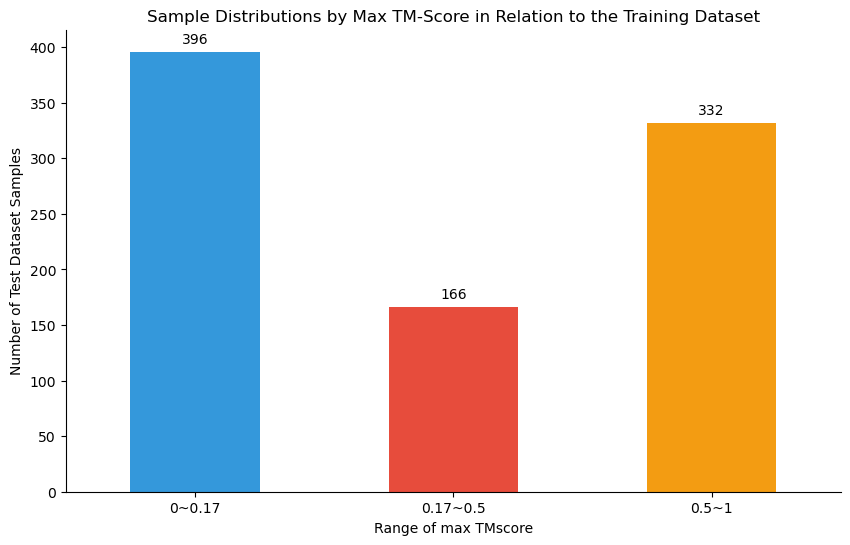

In [35]:
bins = [0, 0.17, 0.5, 1]
labels = ['0~0.17', '0.17~0.5', '0.5~1']
test_dataset['range'] = pd.cut(test_dataset['max_tmscore'], bins=bins, labels=labels, right=False)
count_series = test_dataset['range'].value_counts().reindex(labels)

# 绘制柱状图
plt.figure(figsize=(10, 6)) 
ax = count_series.plot(kind='bar', color=['#3498db', '#e74c3c', '#f39c12'])
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
for i, count in enumerate(count_series):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.title('Sample Distributions by Max TM-Score in Relation to the Training Dataset')
plt.xlabel('Range of max TMscore')
plt.ylabel('Number of Test Dataset Samples')
plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()